# Logistic Regression

* It's used for Classification problems, not Regression.
* Logistic regression outputs probabilities
* If the probability 'p' is greater than 0.5:
    * the data is labeled '1;
    * otherwise '0'

It produces a **Linear Decision Boundary**

In [ ]:
# Imports
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

Loading & cleaning data

In [27]:
votes = pd.read_csv("../../files/house-votes-84.csv")

# Removing NaN
imputer = SimpleImputer(missing_values='?', strategy="most_frequent")
imputer.fit(votes)
votes_temp = imputer.transform(votes)
votes = pd.DataFrame(votes_temp)

# Converting data to 0/1
X = votes.iloc[:,1:].eq('y').mul(1)
y = votes.iloc[:,0].eq('republican').mul(1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

[['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['democrat' 'n' 'y' ... 'y' 'n' 'n']
 ['democrat' 'n' 'y' ... 'n' 'n' 'y']
 ...
 ['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['republican' 'n' 'n' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'n' 'n']]


Logistic Regression

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) #Democrats
y_pred = logreg.predict(X_test)

## Receiver Operating Characteristic (ROC) Curve

By default, the threshold is 0.5, but it can be changed so the curve accepts or rejects more elements

When the threshold is 0, then all is accepted, therefore when is 1 all is rejected

> I need to use another dataset with binary

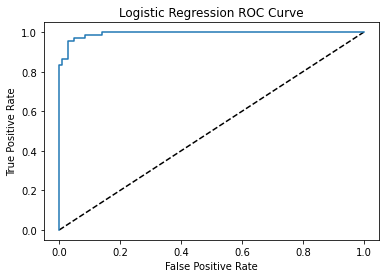

In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

# fpr : false positive
# tpr : true positive

plt.plot([0,1], [0,1],'k--')
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## Area under the ROC Curve

This is another metroic we can use for evaluate the mode

* Larger area under the curve better model

[Area under curve](../images/roc_area_under_curve.png)

In [30]:
from sklearn.metrics import  roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9931650160412889

### AUC using Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print(cv_score)
print(np.mean(cv_score))


[0.99667037 0.99334073 0.99579125 1.         0.96197827]
0.9895561235738818


# Hyperparameter tuning

For each algorithm we need to find the best hyperparameter (k for knn algorithm for instance).

## Grid Seach Validation

We need to select the
![](../images/grid_search_validation.png)

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)
knn_cv.best_params_
# {n_neighbors: 12}

knn_cv.best_score_
# 0.933216168717